# TASK PART 1.3 VISUALIZATIONS

**THIS NOTEBOOK CONTAINS THE FOLLOWING SCRIPT:**

    1. Importing libraries and files with checks
    2. Bar chart showing busiest day of the week
    3. Histogram showing the busiest hours of the day
    4. Price ranges histogram
    5. Line chart showing differences in expenditure per day
    6. Bar Chart showing which department hast the most orders.
    7. Frequency Flag Pie Chart
    8. Relationship between number of dependants and age
    9. Relationship Between Age and Income Scatterplot
    10. Times people spend the most money
    11. Connection between loyalty flag and ordering habits
    12. Connection between Region and ordering habits
    13. Relationship between age and family status in terms of ordering habits
    14. Income profile activity ordering habits
    15. Dependant profile activity ordering habits
    16. Department profile activity ordering habits
    17. Customer profile agg

**1. Importing libraries and files with checks**

In [1]:
#import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#define path
path = r'C:\Users\ddgal\OneDrive\Desktop\Career Foundry Tasks\Data Immersion\22-03-2023 Instacart Basket Analysis'

#import file as df since we will only work with one data frame
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_ords_prods_dep_merge.pkl'))

In [3]:
#check df number of colums and rows

df.shape

(30964564, 38)

In [4]:
#display all columns

pd.set_option('display.max_columns', None)

In [5]:
#check columns

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,customer_flag,loyalty_flag,avg_user_price,spender_flag,med_days_prior_order,frequency_flag,gender,state,age,date_joined,num_of_dependants,fam_status,income,region,customer_activity,age_profile,income_profile,dependant_profile,department_profile,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regular Days,Average orders,10,New customer,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity,young-adult,lower-middle class,multi-family,no pet or baby,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity,young-adult,lower-middle class,multi-family,no pet or baby,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity,young-adult,lower-middle class,multi-family,no pet or baby,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity,young-adult,lower-middle class,multi-family,no pet or baby,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity,young-adult,lower-middle class,multi-family,no pet or baby,beverages


**2. Bar chart showing busiest day of the week**

Text(0.5, 1.0, 'Frequency Of Orders Per Day')

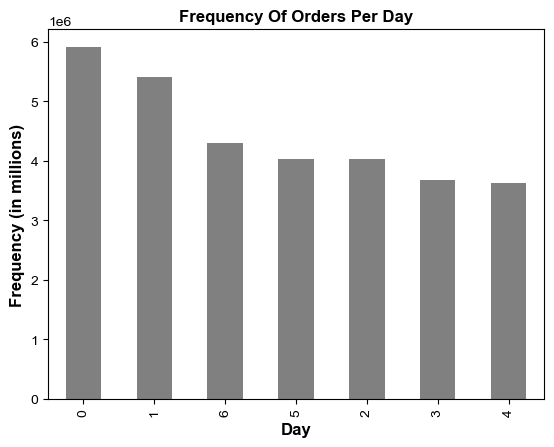

In [6]:
#create bar graph showing busiest day of the week

bar_busiest_day = df['orders_day_of_week'].sort_index().value_counts().plot.bar(color = ['grey'])
sns.set_style('ticks')
plt.xlabel('Day', fontsize=12, fontweight='bold')
plt.ylabel('Frequency (in millions)', fontsize=12, fontweight='bold')
plt.title('Frequency Of Orders Per Day', fontsize=12, fontweight='bold')

Saturday (0) and Sunday (1) are the busiest days of the week with the most orders.

In [7]:
#export bar_busiest_day

bar_busiest_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_busiest_day.png'))

**3. Histogram showing the busiest hours of the day**

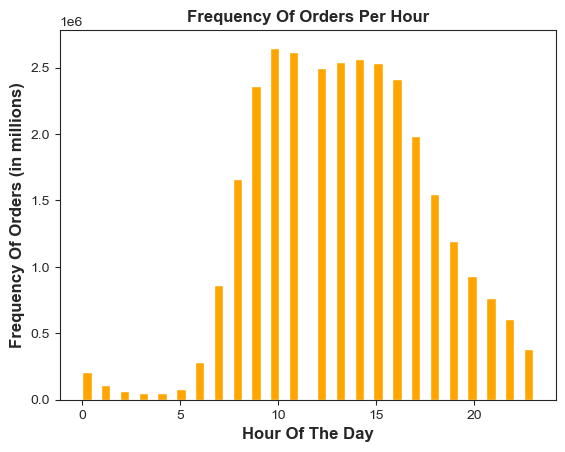

In [8]:
#create histogram showing busiest hour of the day

hist_busiest_hour= df['order_hour_of_day'].plot.hist(bins = 48, color = ['orange'])
sns.set_style('ticks')
plt.xlabel('Hour Of The Day', fontsize=12, fontweight='bold')
plt.ylabel('Frequency Of Orders (in millions)', fontsize=12, fontweight='bold')
plt.title('Frequency Of Orders Per Hour', fontsize=12, fontweight='bold')
plt.show()

The histogram clearly shows that the busiest hours of the day for the entire data set is between 8 and 18 or 8am and 6pm.

In [9]:
#export hist_busiest_hour

hist_busiest_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_busiest_hour.png'))

**4. Price ranges histogram**

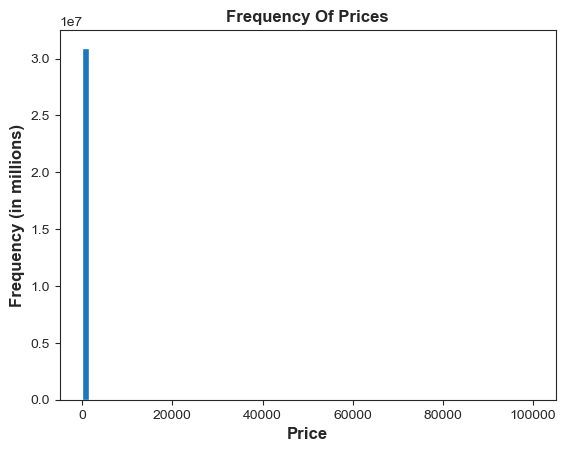

In [10]:
#create histogram showing which price ranges are most frequent

hist_prices = df['prices'].plot.hist(bins = 70)
sns.set_style('ticks')
plt.xlabel('Price', fontsize=12, fontweight='bold')
plt.ylabel('Frequency (in millions)', fontsize=12, fontweight='bold')
plt.title('Frequency Of Prices', fontsize=12, fontweight='bold')
plt.show()

This does not make any sense, let us investigate further.

In [11]:
#check prices statistical information

df['prices'].describe()

count    3.096456e+07
mean     1.193352e+01
std      4.913444e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

So, the max value does not make any sense. Lets see if we can isolate the price values over 100. We are using 100 as a max prices people would be willing to pay for a grocery item.

In [12]:
#display df with only prices over 100

df.loc[df['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,customer_flag,loyalty_flag,avg_user_price,spender_flag,med_days_prior_order,frequency_flag,gender,state,age,date_joined,num_of_dependants,fam_status,income,region,customer_activity,age_profile,income_profile,dependant_profile,department_profile,department
7644,1435153,1519,26,2,11,6.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regular Days,Most orders,47,Existing customer,Loyal customer,50.932895,High spender,6.0,Frequent customer,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,Northeast,high-activity,senior,upper-middle class,single-family,no pet or baby,dairy eggs
7645,1066435,1519,32,3,10,5.0,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Slowest days,Most orders,47,Existing customer,Loyal customer,50.932895,High spender,6.0,Frequent customer,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,Northeast,high-activity,senior,upper-middle class,single-family,no pet or baby,dairy eggs
14883,1697208,2409,33,1,19,5.0,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Busiest days,Average orders,48,Existing customer,Loyal customer,35.233761,High spender,5.0,Frequent customer,Female,Hawaii,55,11/11/2018,2,married,230074,West,high-activity,middle-aged,upper-middle class,multi-family,no pet or baby,dairy eggs
19948,965345,3531,27,2,19,8.0,33664,2,0,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Regularly busy,Regular Days,Average orders,29,Existing customer,Regular customer,267.469870,High spender,8.0,Frequent customer,Female,Hawaii,80,10/6/2019,2,married,233776,West,high-activity,senior,upper-middle class,multi-family,no pet or baby,dairy eggs
20141,2943740,3793,1,2,9,NaN,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regular Days,Most orders,18,Existing customer,Regular customer,71.191102,High spender,14.0,Regular customer,Male,Louisiana,59,8/23/2019,3,married,182933,South,high-activity,middle-aged,upper-middle class,multi-family,no pet or baby,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30896050,3138833,51346,1,6,4,NaN,33664,1,0,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Regularly busy,Regular Days,Fewest orders,5,New customer,New customer,6390.138298,High spender,13.0,Regular customer,Male,Rhode Island,58,1/25/2019,1,married,207497,Northeast,high-activity,middle-aged,upper-middle class,multi-family,no pet or baby,dairy eggs
30896051,1275440,51346,3,2,7,11.0,33664,5,1,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Regularly busy,Regular Days,Average orders,5,New customer,New customer,6390.138298,High spender,13.0,Regular customer,Male,Rhode Island,58,1/25/2019,1,married,207497,Northeast,high-activity,middle-aged,upper-middle class,multi-family,no pet or baby,dairy eggs
30896052,3265389,51346,4,1,17,13.0,33664,2,1,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Regularly busy,Busiest days,Average orders,5,New customer,New customer,6390.138298,High spender,13.0,Regular customer,Male,Rhode Island,58,1/25/2019,1,married,207497,Northeast,high-activity,middle-aged,upper-middle class,multi-family,no pet or baby,dairy eggs
30898836,1179092,131671,12,4,9,15.0,33664,1,0,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Least busy,Slowest days,Most orders,13,Existing customer,Regular customer,3453.431034,High spender,13.0,Regular customer,Female,Rhode Island,35,8/4/2018,0,single,86490,Northeast,high-activity,young-adult,middle-class,single-family,no pet or baby,dairy eggs


The prices over 100 are obviously outliers, so lets replace them with Nan values.

In [13]:
#replace price values over 100 with Nan

df.loc[df['prices'] >100, 'prices'] = np.nan

In [14]:
#check

df['prices'].max()

25.0

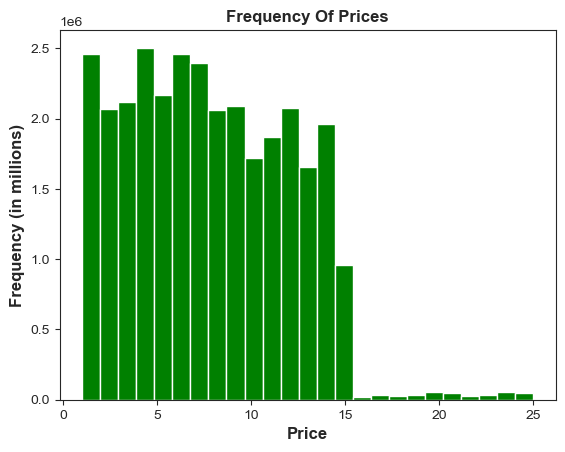

In [15]:
#try histogram again with revised max

hist_prices = df['prices'].plot.hist(bins = 25, color = ['green'])
sns.set_style('ticks')
plt.xlabel('Price', fontsize=12, fontweight='bold')
plt.ylabel('Frequency (in millions)', fontsize=12, fontweight='bold')
plt.title('Frequency Of Prices', fontsize=12, fontweight='bold')
plt.show()

The price ranges from 1 to 15 are the most common and should be adhered to maximize profits.

In [16]:
#export hist_prices

hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

**5. Line chart showing differences in expenditure per day**

In [17]:
#creates list of random True/False to test random.rand and sets seed

np.random.seed(4) #set seed
dev = np.random.rand(len(df)) <= 0.7

In [18]:
#sets size of big(70%) and small(30%) from df subset

big = df[dev]
small = df[~dev]

In [19]:
#checks length big and small to ensure it is equal to the number of rows in df

len(big) + len(small)

30964564

In [20]:
#assigns df_hour_prices to small

df_hour_prices = small[['order_hour_of_day','prices']]

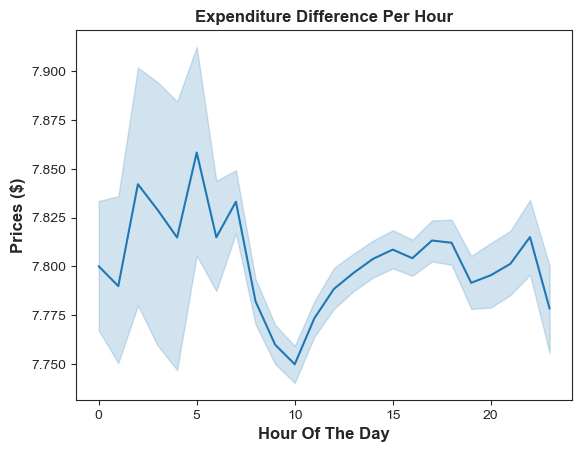

In [21]:
#create line chart from df_hour_prices

line_hour_prices = sns.lineplot(data = df_hour_prices, x = 'order_hour_of_day',y = 'prices')
sns.set_style('ticks')
plt.xlabel('Hour Of The Day', fontsize=12, fontweight='bold')
plt.ylabel('Prices ($)', fontsize=12, fontweight='bold')
plt.title('Expenditure Difference Per Hour', fontsize=12, fontweight='bold')
plt.show()

The lowest price can be found at 10am at around 7.75.  The higest price can be found at 5am at around 7.86.  This is a difference of 0.36 which is negligible.

In [22]:
#export line_hour_prices

line_hour_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_prices.png'))

**6. Bar Chart showing which department hast the most orders.**

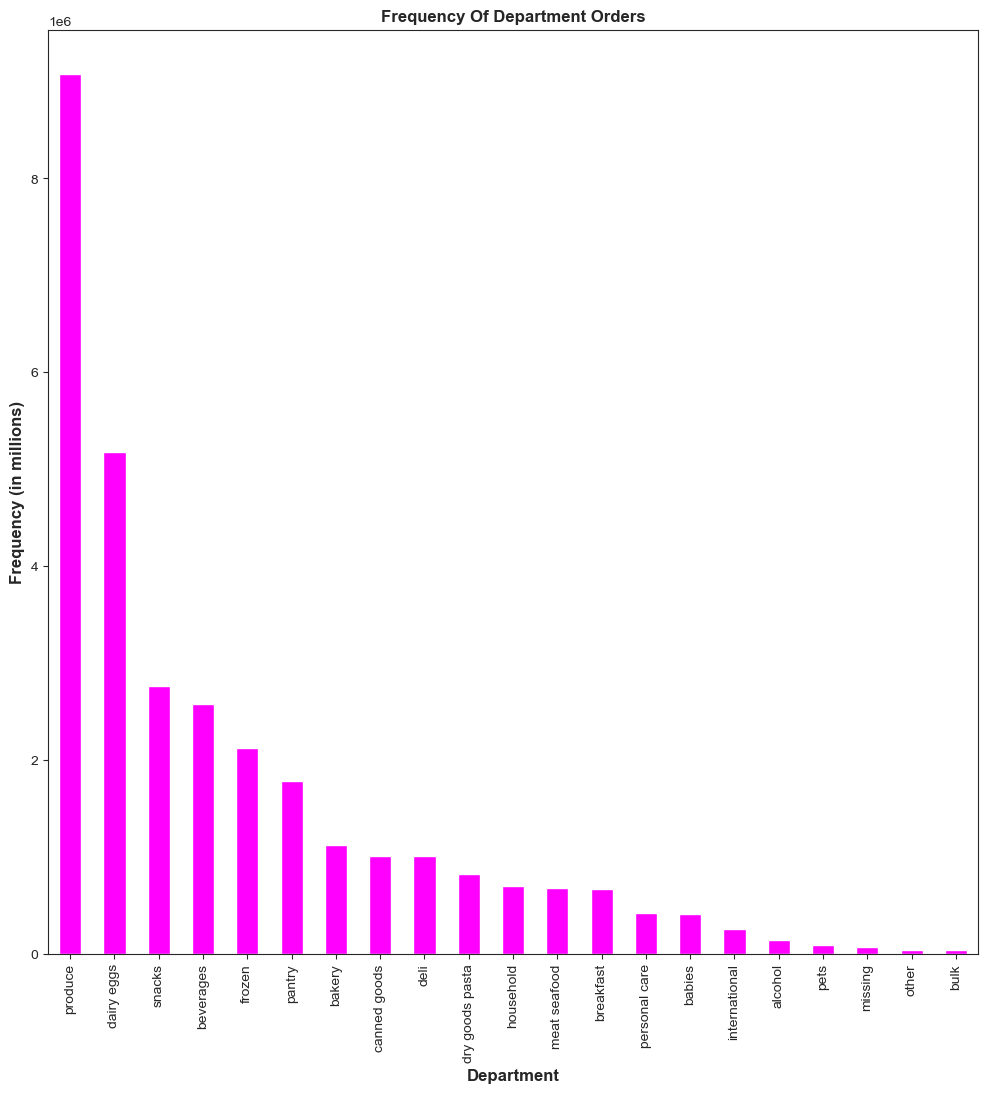

In [23]:
#create bar graph for department with most orders

bar_dep_freq = df['department'].sort_index().value_counts().plot.bar(color = ['magenta'], figsize=(12,12))
sns.set_style('ticks')
plt.xlabel('Department', fontsize=12, fontweight='bold')
plt.ylabel('Frequency (in millions)', fontsize=12, fontweight='bold')
plt.title('Frequency Of Department Orders', fontsize=12, fontweight='bold')
plt.show()

Produce far exceedds any other department for most orders, followed by dairy eggs, snacks, beverages, and frozen respectively. This graph also shows the number of orders for babies and pets is so low that making an entire column singling out people with babies and pets almost meaningless since they consist of a neglible proportion of orders.

In [24]:
#export bar_dep_freq

bar_dep_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_freq.png'))

**7.Frequency Flag Pie Chart**

In [25]:
#create region_table counts frequency of frequency_flag

frequency_table = df['frequency_flag'].value_counts(dropna=False)
frequency_table

Frequent customer        21204476
Regular customer          6865113
Non-frequent customer     2894975
Name: frequency_flag, dtype: int64

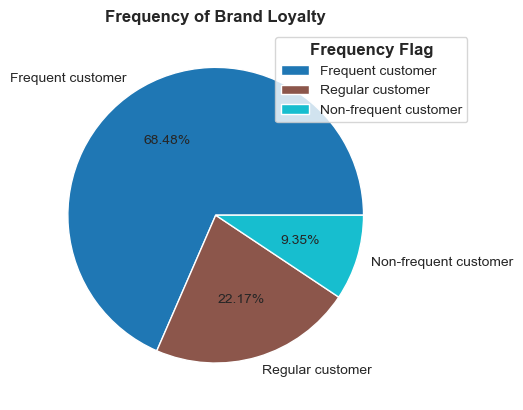

In [26]:
#create pie chart based on frequency_flag counts

frequency_pie = frequency_table.plot(kind='pie', colormap='tab10', autopct='%1.2f%%')
plt.title('Frequency of Brand Loyalty', fontsize=12, fontweight='bold')
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1)) #bbox moves legend outside the plot area and to right
legend.set_title('Frequency Flag')
title = legend.get_title()
title.set_fontsize(12)
title.set_fontweight('bold')
plt.ylabel('') #remove ylabel

plt.show()

From the above chart in regards to the frequency_flag it is clear that frequent customers far out number, regular customers, and non-frequent ones, respectively.  

In [27]:
#export frequency_pie

frequency_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequency_pie.png'))

**8. Relationship between number of children and age**

In [28]:
#create df_age_children from small subset containing columns age and num_of_children

df_age_child = small[['age','num_of_dependants']]

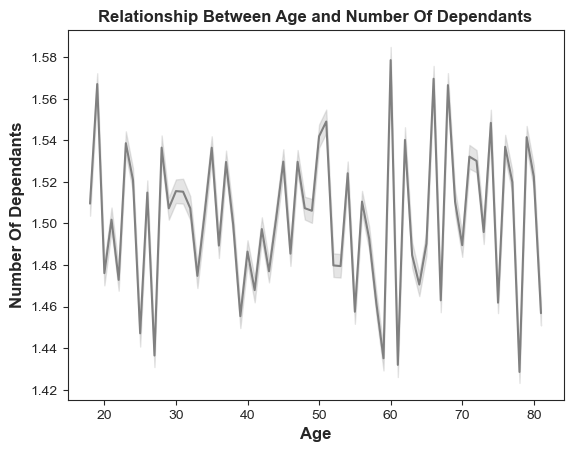

In [29]:
#create line chart from df_age_child

line_age_child= sns.lineplot(data = df_age_child, x = 'age', y = 'num_of_dependants', color='grey')
sns.set_style('ticks')
plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('Number Of Dependants', fontsize=12, fontweight='bold')
plt.title('Relationship Between Age and Number Of Dependants', fontsize=12, fontweight='bold')
plt.show()

There is no relationship between age and number of dependants. The only thing this tells us is almost everybody who has dependants has on average between 1 and 1.6. This, however makes no sense as you cannot have a fraction of a dependant.

In [30]:
#export line_age_child

line_age_child.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_child.png'))

**9. Relationship Between Age and Income Scatterplot**

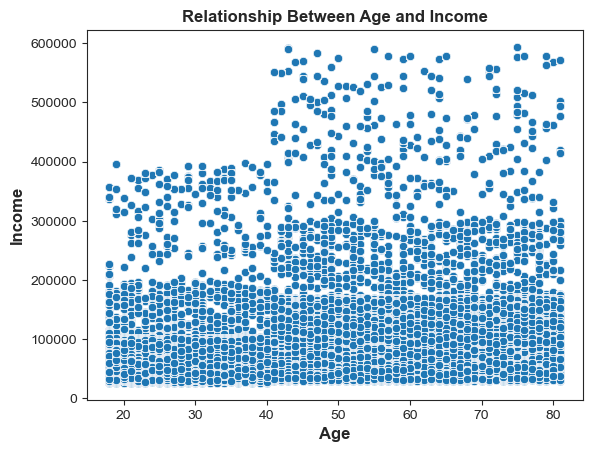

In [31]:
#create scatter plot scatter_age_income

scatter_age_income = sns.scatterplot(x = 'age', y = 'income', data = df)
sns.set_style('ticks')
plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('Income', fontsize=12, fontweight='bold')
plt.title('Relationship Between Age and Income', fontsize=12, fontweight='bold')
plt.show()

This scatter plot shows us the highest earners of over 400,000 income all occur in people over 40. It also tell us, that most people earn under 200,000 income. However, there is no clear pattern between age and income, if there were the plots would follow a line upwards as age increased; if income was directly related to age.

In [32]:
#export scatter_age_income

scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))

**10. Times people spend the most money**

In [33]:
#create time_most_money that groups the busiest_period_of_day with the sum of its corresponding prices

time_most_money = df.groupby('busiest_period_of_day')['prices'].sum().sort_values(ascending = False)
time_most_money

busiest_period_of_day
Most orders       157041525.9
Average orders     74523504.8
Fewest orders       9629204.9
Name: prices, dtype: float64

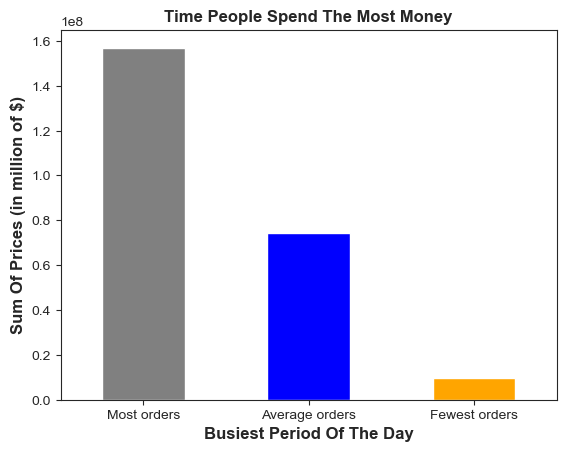

In [34]:
#create bar graph from time_most_money

time_most_money_bar = time_most_money.plot(kind='bar', color = ['grey', 'blue', 'orange']) 
sns.set_style('ticks')
plt.xlabel('Busiest Period Of The Day', fontsize=12, fontweight='bold')
plt.ylabel('Sum Of Prices (in million of $)', fontsize=12, fontweight='bold')
plt.xticks(rotation=0) #sets orientation of xaxis variables
plt.title('Time People Spend The Most Money', fontsize=12, fontweight='bold')

plt.show()

From the chart on the left in regards to the frequency_flag it is clear that frequent customers far out number, regular customers, and non-frequent ones, respectively. In addition, in relation to the loyalty flag,  regular customers also exceed loyal and new ones, respectively.

In [35]:
#export  time_most_money

time_most_money_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'time_most_money_bar.png'))

**11. Connection between loyalty flag and ordering habits**

In [36]:
#create table signifying who spends the most money

loyflag_money = df.groupby('loyalty_flag')['prices'].sum().sort_values(ascending = False)
loyflag_money

loyalty_flag
Regular customer    123790606.2
Loyal customer       79933825.2
New customer         37469804.2
Name: prices, dtype: float64

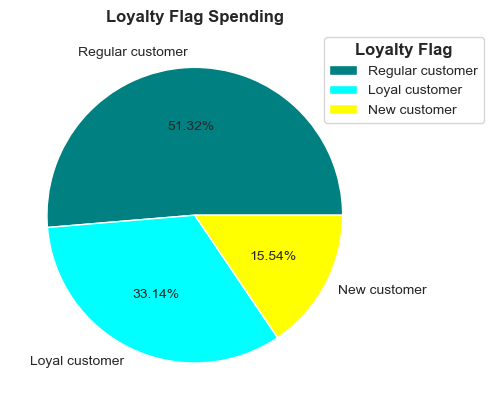

In [82]:
#create pie chart based on incomeprof_money

loyflag_money_pie = loyflag_money.plot(kind='pie', colors =['teal', 'cyan', 'yellow'], autopct='%1.2f%%')
plt.title('Loyalty Flag Spending', fontsize=12, fontweight='bold')
legend = plt.legend(loc= 'upper right', bbox_to_anchor=(1.3, 1)) #bbox moves legend outside the plot area and to right
legend.set_title('Loyalty Flag')
title = legend.get_title()
title.set_fontsize(12)
title.set_fontweight('bold')
plt.ylabel('') #remove ylabel

plt.show()

So from the loyalty_flag profile regular customers, loyal customers, and new customers spend the most money, respectively.

In [86]:
loyflag_money_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyflag_money_pie.png'))

In [39]:
#create cross tab between loyalty_flag and department

ct_loyalty_dep = pd.crosstab(df['department'], df['loyalty_flag'])
ct_loyalty_dep_sorted = ct_loyalty_dep.sort_values(by=ct_loyalty_dep.columns.tolist(), ascending=False) #sort them by higest to lowest
ct_loyalty_dep_sorted

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
produce,3147376,1336604,4595293
dairy eggs,1830707,750056,2596419
snacks,943150,413107,1410149
beverages,855017,396649,1320235
frozen,609460,372271,1140000
pantry,560402,299576,922727
bakery,379873,172104,568851
deli,324046,158335,521453
canned goods,294594,180196,537284


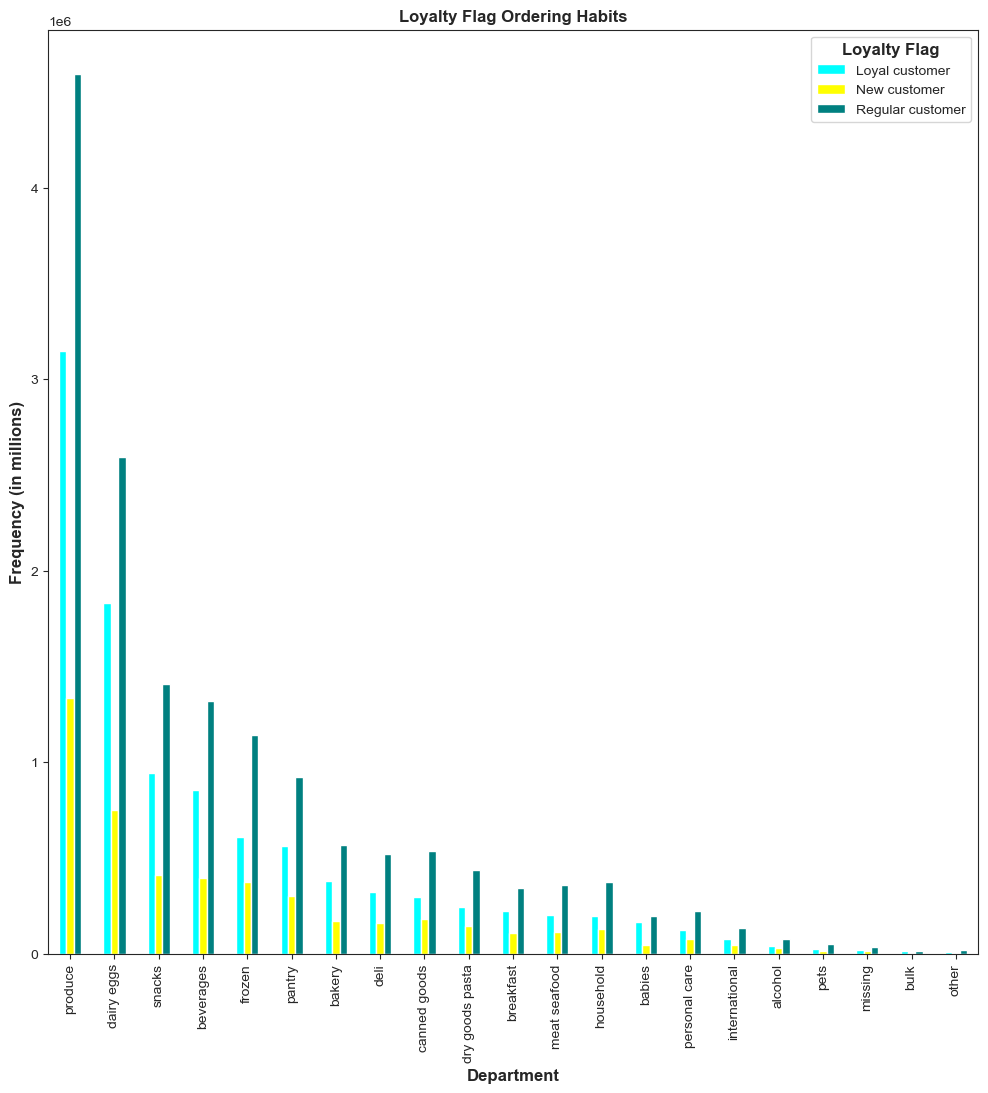

In [83]:
#create bar chart from ct_loyalty_dep

loyal_dep_bar = ct_loyalty_dep_sorted.plot(kind='bar', color=['cyan', 'yellow','teal'], figsize=(12, 12)) 
sns.set_style('ticks')
plt.xlabel('Department', fontsize=12, fontweight='bold')
plt.ylabel('Frequency (in millions)', fontsize=12, fontweight='bold')
plt.title('Loyalty Flag Ordering Habits', fontsize=12, fontweight='bold')
legend = plt.legend()
legend.set_title('Loyalty Flag')
title = legend.get_title()
title.set_fontsize(12)
title.set_fontweight('bold')

plt.show()

For Regular customers, loyal, and new customers their top 5 orders by deparment are produce, dairy eggs, snacks, beverages and frozen. It is also clear from this chart that Loyal customers make the most orders followed by regular customers															
 and new customers, respectively.															


In [87]:
#export loyal_dep_bar

loyal_dep_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyal_dep_bar.png'))

**12. Connection between Region and ordering habits**

In [42]:
#create table signifying who spends the most money

region_money = df.groupby('region')['prices'].sum().sort_values(ascending = False)
region_money

region
South        80356321.2
West         61746425.9
Midwest      56574613.8
Northeast    42516874.7
Name: prices, dtype: float64

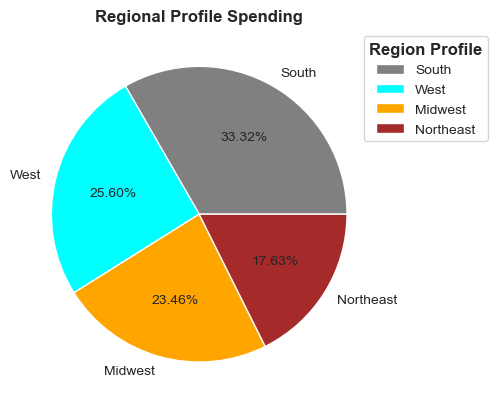

In [90]:
#create pie chart based on incomeprof_money

region_money_pie = region_money.plot(kind='pie', colors=['grey', 'aqua', 'orange', 'brown'], autopct='%1.2f%%')
plt.title('Regional Profile Spending', fontsize=12, fontweight='bold')
legend = plt.legend(loc= 'upper right', bbox_to_anchor=(1.3, 1)) #bbox moves legend outside the plot area and to right
legend.set_title('Region Profile')
title = legend.get_title()
title.set_fontsize(12)
title.set_fontweight('bold')
plt.ylabel('') #remove ylabel

plt.show()

So it is clear that the regions that spend the most money are South, west, midwest, and northeast, respectively.

In [92]:
#export region_money_pie

region_money_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_money_pie.png'))

In [45]:
#create cross tab betweeen department and region

ct_reg_dep = pd.crosstab(df['department'], df['region'])
ct_reg_dep_sorted = ct_reg_dep.sort_values(by=ct_reg_dep.columns.tolist(), ascending=False) #sort them by higest to lowest
ct_reg_dep_sorted

region,Midwest,Northeast,South,West
department,,,,
produce,2134115,1593004,3027476,2324678
dairy eggs,1212490,914616,1723016,1327060
snacks,645143,493154,916780,711329
beverages,598979,462929,859419,650574
frozen,498225,370436,709906,543164
pantry,420334,312731,591754,457886
bakery,261753,199300,371620,288155
canned goods,237459,176936,337458,260221
deli,234464,178398,333620,257352


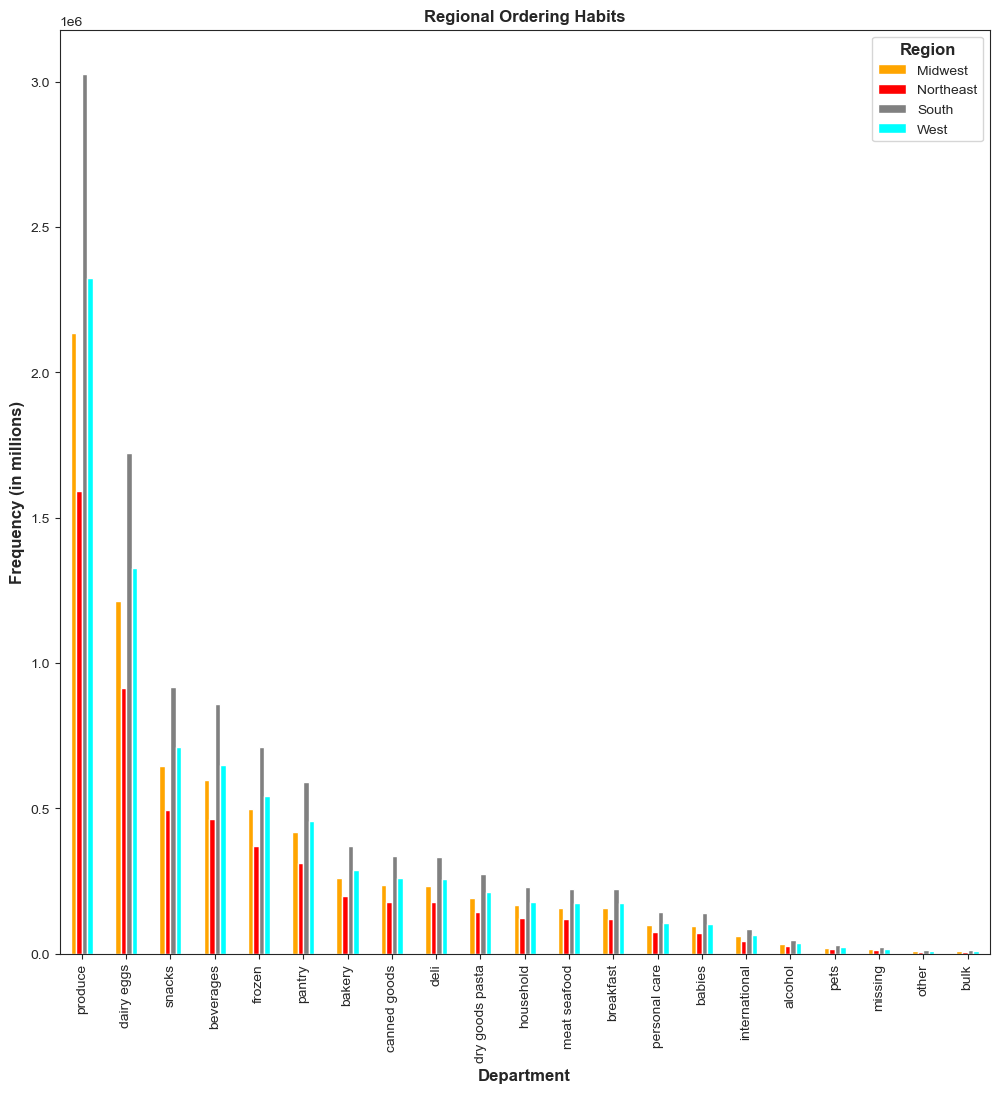

In [91]:
#create bar graph from ct_reg_dep

reg_dep_bar = ct_reg_dep_sorted.plot(kind='bar', color=['orange','red', 'grey', 'aqua'], figsize=(12, 12)) 
sns.set_style('ticks')
plt.xlabel('Department', fontsize=12, fontweight='bold')
plt.ylabel('Frequency (in millions)', fontsize=12, fontweight='bold')
plt.title('Regional Ordering Habits', fontsize=12, fontweight='bold')
legend = plt.legend()
legend.set_title('Region')
title = legend.get_title()
title.set_fontsize(12)
title.set_fontweight('bold')

plt.show()

From the Regional ordering habits chart, it is clear that the South, West, Midwest, and Northeast have the most orders, respectively.
For all regions, the top 5 orders by deparment are produce, dairy eggs, snacks, beverages and frozen.

In [93]:
#export reg_dep_bar

reg_dep_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'reg_dep_bar.png'))

**13. Relationship between age and family status in terms of ordering habits**

In [48]:
#create crosstab ct_age_fam

ct_age_fam = pd.crosstab(index = df['age_profile'], columns = df['fam_status'], dropna=False)
ct_age_fam

fam_status,divorced/widowed,living with parents and siblings,married,single
age_profile,,,,
middle-aged,623313,0,9046762,2433835
senior,2021958,0,6173586,0
young-adult,0,1481172,6523363,2660575


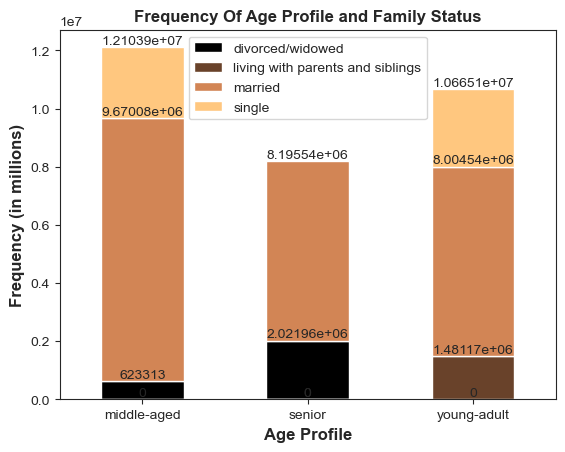

In [49]:
#create bar chart with ct_age_family

stack_age_fam = ct_age_fam.plot(kind='bar', stacked=True, colormap='copper') 
plt.xlabel('Age Profile', fontsize=12, fontweight='bold')
plt.ylabel('Frequency (in millions)', fontsize=12, fontweight='bold')
plt.xticks(rotation=0) #sets orientation of xaxis variables
plt.title('Frequency Of Age Profile and Family Status', fontsize=12, fontweight='bold')
legend = plt.legend() 
title = legend.get_title()
title.set_fontsize(12)
title.set_fontweight('bold')
legend.set_title('')
title = legend.get_title()
title.set_fontsize(12)
title.set_fontweight('bold')

#add labels for bar stacks
for i in stack_age_fam.containers:
    stack_age_fam.bar_label(i)
plt.show()


It is clear that married middle-aged individuals make the most orders, followed by married young adult, married senior, respectively.														


In [50]:
#export stack_age_fam

stack_age_fam.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stack_age_fam.png'))

In [51]:
#create crosstab between department and age_profile

ct_ageprof_dep = pd.crosstab(df['department'], df['age_profile'])
ct_ageprof_dep_sort = ct_ageprof_dep.sort_values(by=ct_ageprof_dep.columns.tolist(), ascending=False) #sort them by higest to lowest
ct_ageprof_dep_sort                                             

age_profile,middle-aged,senior,young-adult
department,,,
produce,3542316,2408104,3128853
dairy eggs,2015807,1368072,1793303
snacks,1079570,728549,958287
beverages,1013708,684020,874173
frozen,830678,564250,726803
pantry,698160,472383,612162
bakery,438829,295997,386002
canned goods,394849,267509,349716
deli,392790,265199,345845


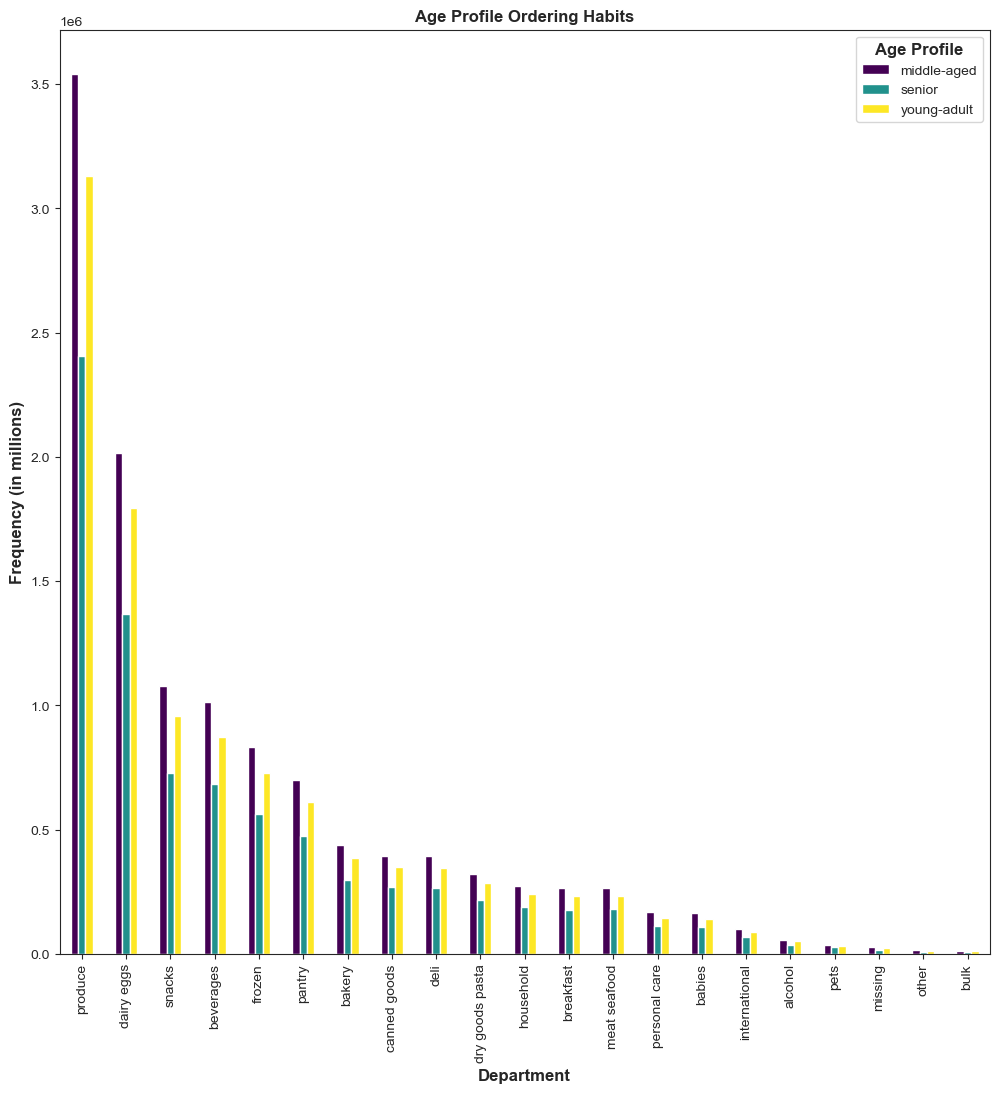

In [52]:
#create bar graph from ct_ageprof_dep_sort

bar_ageprof_dept = ct_ageprof_dep_sort.plot(kind='bar', colormap='viridis', figsize=(12, 12)) 
sns.set_style('ticks')
plt.xlabel('Department', fontsize=12, fontweight='bold')
plt.ylabel('Frequency (in millions)', fontsize=12, fontweight='bold')
plt.title('Age Profile Ordering Habits', fontsize=12, fontweight='bold')
legend = plt.legend()
legend.set_title('Age Profile')
title = legend.get_title()
title.set_fontsize(12)
title.set_fontweight('bold')

plt.show()

The top five deparments ordered by all age_pofiles are produce, dairy eggs, snacks, and beverages.

In [53]:
#export bar_ageprof_dept

bar_ageprof_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ageprof_dept.png'))

In [54]:
#create crosstab between department and fam_status

ct_famstat_dep = pd.crosstab(df['department'], df['fam_status'])
ct_famstat_dep_sort = ct_famstat_dep.sort_values(by=ct_famstat_dep.columns.tolist(), ascending=False) 
ct_famstat_dep_sort

fam_status,divorced/widowed,living with parents and siblings,married,single
department,,,,
produce,777094,430539,6373293,1498347
dairy eggs,442602,250207,3632599,851774
snacks,236244,131310,1944658,454194
beverages,220879,119107,1807453,424462
frozen,183957,102993,1489390,345391
pantry,151891,85845,1252956,292013
bakery,95735,53684,785749,185660
deli,86749,48119,702333,166633
canned goods,84268,48477,712577,166752


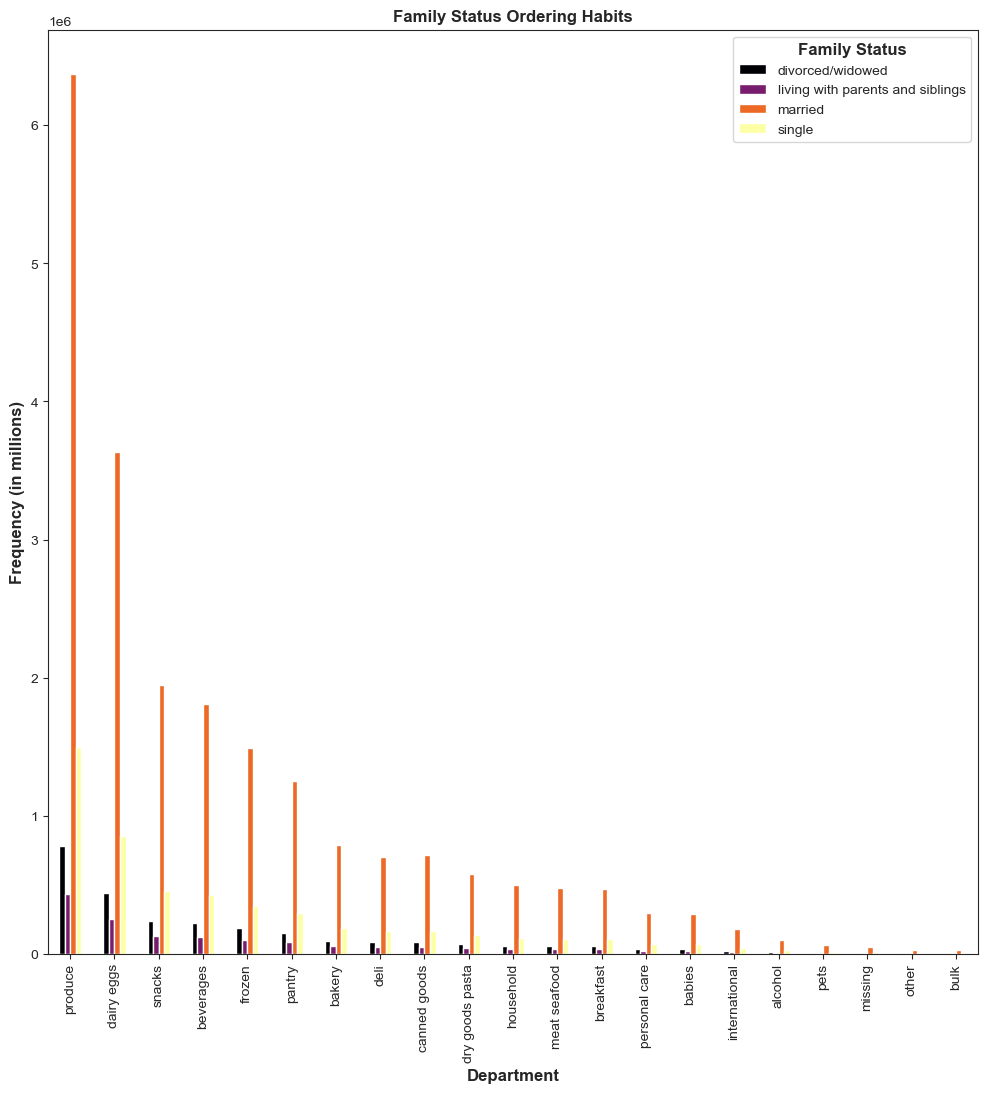

In [55]:
#create bar graph from ct_famstat_dep_sort

bar_famstat_dept = ct_famstat_dep_sort.plot(kind='bar', colormap='inferno', figsize=(12, 12)) 
sns.set_style('ticks')
plt.xlabel('Department', fontsize=12, fontweight='bold')
plt.ylabel('Frequency (in millions)', fontsize=12, fontweight='bold')
plt.title('Family Status Ordering Habits', fontsize=12, fontweight='bold')
legend = plt.legend()
legend.set_title('Family Status')
title = legend.get_title()
title.set_fontsize(12)
title.set_fontweight('bold')

plt.show()

The top five deparments ordered by all fam_status are produce, dairy eggs, snacks, and beverages.

In [56]:
#export bar_famstat_dep

bar_famstat_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_famstat_dept.png'))

**14. Income profile activity ordering habits**

In [57]:
#create table signifying who spends most money
incomeprof_money = df.groupby('income_profile')['prices'].sum().sort_values(ascending = False)
incomeprof_money

income_profile
middle-class          112595186.0
upper-middle class     96251539.3
lower-middle class     24954145.9
lower-class             5837164.8
upper-class             1556199.6
Name: prices, dtype: float64

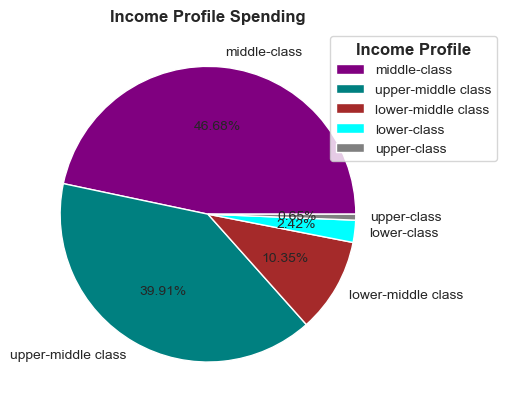

In [118]:
#create pie chart based on incomeprof_money

incomeprof_money_pie = incomeprof_money.plot(kind='pie', colors=['purple', 'teal', 'brown', 'cyan', 'grey'], autopct='%1.2f%%')
plt.title('Income Profile Spending', fontsize=12, fontweight='bold')
legend = plt.legend(loc= 'upper right', bbox_to_anchor=(1.3, 1)) #bbox moves legend outside the plot area and to right
legend.set_title('Income Profile')
title = legend.get_title()
title.set_fontsize(12)
title.set_fontweight('bold')
plt.ylabel('') #remove ylabel

plt.show()

The middle class, upper-middle class, and lower-middle class spend the most money, respectively.

In [120]:
#export incomeprof_money_pie

incomeprof_money_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_incomeprof.png'))

In [60]:
#create cross tab between department and income_profile

ct_incomeprof_dep = pd.crosstab(df['department'], df['income_profile'])
ct_incomeprof_dep_sort = ct_incomeprof_dep.sort_values(by=ct_incomeprof_dep.columns.tolist(), ascending=False) 
ct_incomeprof_dep_sort

income_profile,lower-class,lower-middle class,middle-class,upper-class,upper-middle class
department,,,,,
produce,217009,922543,4275660,40393,3623668
snacks,161008,512745,1136000,17615,939038
dairy eggs,129807,551009,2407693,34515,2054158
beverages,105643,374099,1115942,19746,956471
frozen,58007,229961,978050,15647,840066
pantry,42549,183672,827903,12515,716066
deli,28460,113298,462862,5772,393442
bakery,26905,117181,520030,9998,446714
breakfast,25586,90954,296600,5002,252708


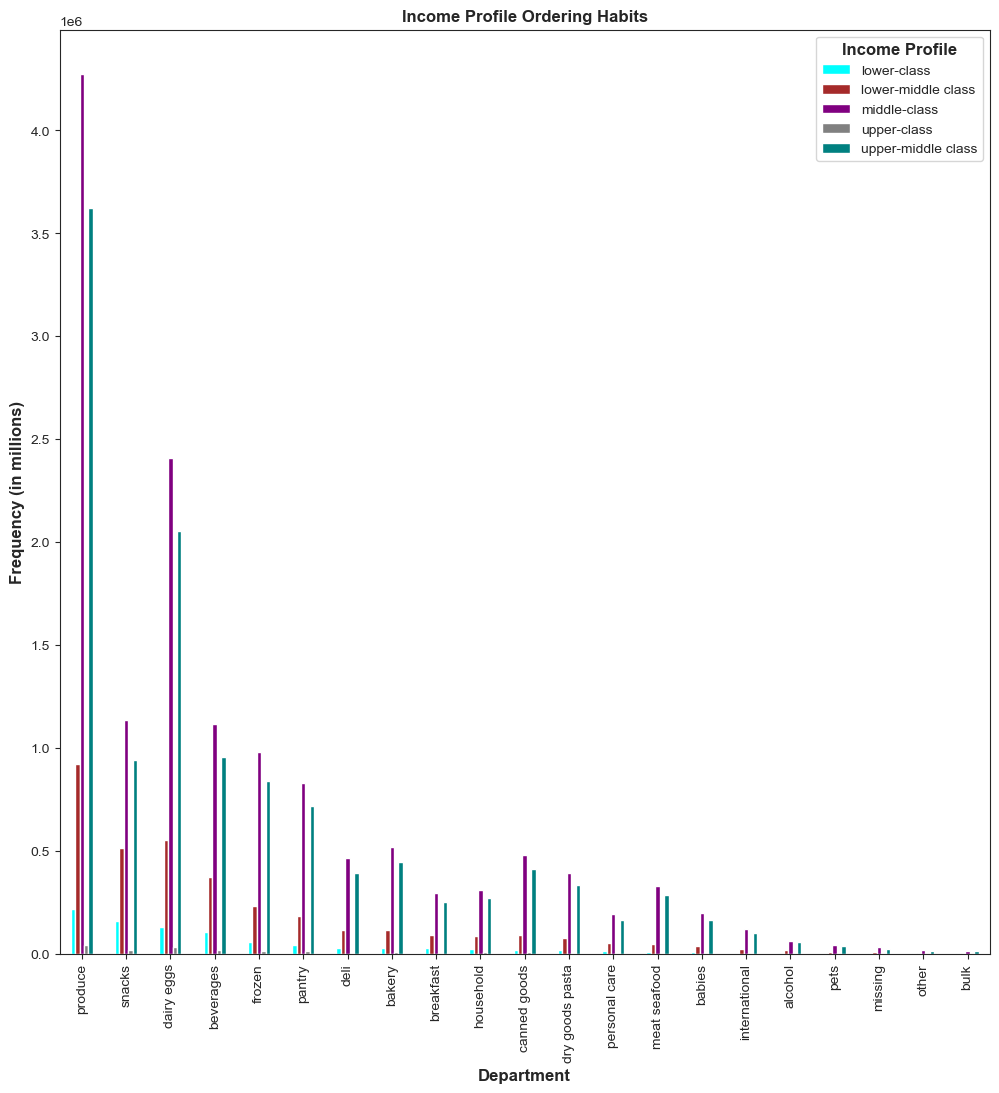

In [119]:
#create bar graph from ct_incomeprof_dep_sort

bar_incomeprof_dep = ct_incomeprof_dep_sort.plot(kind='bar', color=['cyan', 'brown', 'purple', 'grey', 'teal'], figsize=(12, 12)) 
sns.set_style('ticks')
plt.xlabel('Department', fontsize=12, fontweight='bold')
plt.ylabel('Frequency (in millions)', fontsize=12, fontweight='bold')
plt.title('Income Profile Ordering Habits', fontsize=12, fontweight='bold')
legend = plt.legend()
legend.set_title('Income Profile')
title = legend.get_title()
title.set_fontsize(12)
title.set_fontweight('bold')

plt.show()

The ordering habits by department for the income_profile is not as consistent as all the other ones.  However, the top five remain the same: produce, dairy eggs, snacks, and beverages. They just may not be in that exact order for all the different income_profiles.  The middle-class, upper-middle class, and lower-middle class make the most orders, respectively.

In [121]:
#export bar_incomeprof_dep

bar_incomeprof_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_incomeprof_dep.png'))

**15. Dependant profile activity ordering habits**

In [63]:
#create table signifying who spends the most money

depprof_money = df.groupby('dependant_profile')['prices'].sum().sort_values(ascending = False)
depprof_money

dependant_profile
multi-family     180914742.9
single-family     60279492.7
Name: prices, dtype: float64

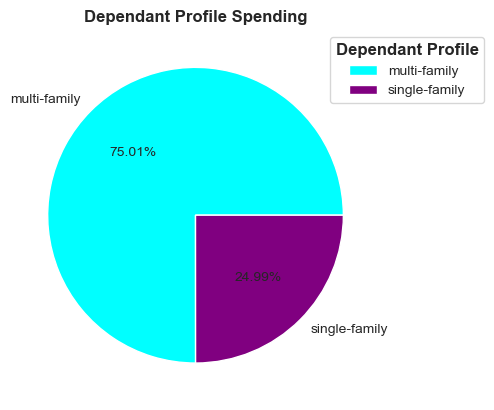

In [113]:
#create pie chart based on depprof_money

depprof_money_pie = depprof_money.plot(kind='pie', colors=['aqua', 'purple'], autopct='%1.2f%%')
plt.title('Dependant Profile Spending', fontsize=12, fontweight='bold')
legend = plt.legend(loc= 'upper right', bbox_to_anchor=(1.3, 1)) #bbox moves legend outside the plot area and to right
legend.set_title('Dependant Profile')
title = legend.get_title()
title.set_fontsize(12)
title.set_fontweight('bold')
plt.ylabel('') #remove ylabel

plt.show()

It is is clear the multi-family spend the most money with 75%

In [114]:
#export depprof_money_pie

depprof_money_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_depprof_money.png'))

In [66]:
#create cross tab between department and dependant_profile

ct_depaprof_dep = pd.crosstab(df['department'], df['dependant_profile'])
ct_depaprof_dep_sort = ct_depaprof_dep.sort_values(by=ct_depaprof_dep.columns.tolist(), ascending=False) 
ct_depaprof_dep_sort

dependant_profile,multi-family,single-family
department,,
produce,6803832,2275441
dairy eggs,3882806,1294376
snacks,2075968,690438
beverages,1926560,645341
frozen,1592383,529348
pantry,1338801,443904
bakery,839433,281395
canned goods,761054,251020
deli,750452,253382


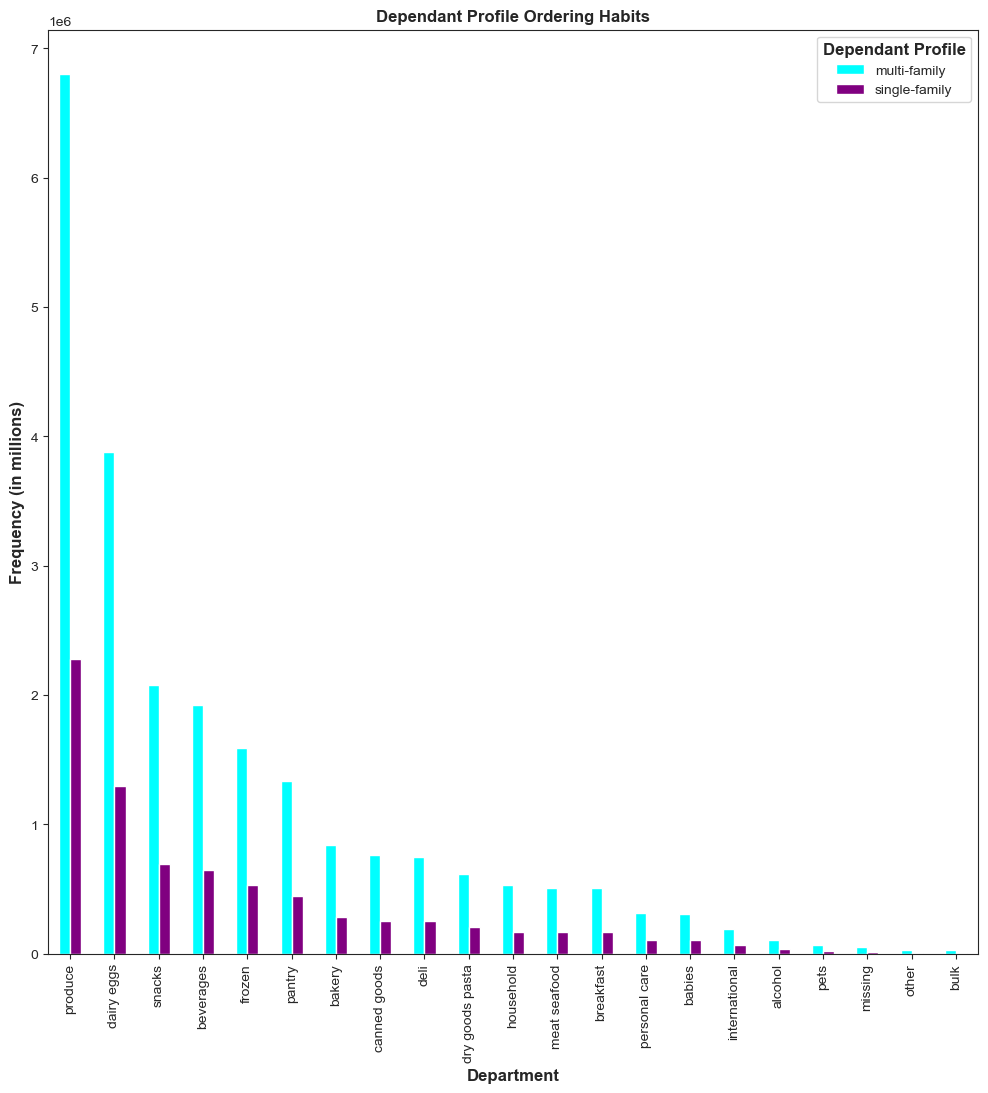

In [111]:
#create bar graph from ct_depprof_dep_sort

bar_depaprof_dept = ct_depaprof_dep_sort.plot(kind='bar', color= ['aqua', 'purple'], figsize=(12, 12)) 
sns.set_style('ticks')
plt.xlabel('Department', fontsize=12, fontweight='bold')
plt.ylabel('Frequency (in millions)', fontsize=12, fontweight='bold')
plt.title('Dependant Profile Ordering Habits', fontsize=12, fontweight='bold')
legend = plt.legend()
legend.set_title('Dependant Profile')
title = legend.get_title()
title.set_fontsize(12)
title.set_fontweight('bold')

plt.show()

So dependant_profile follows same order for department orders: produce, dairy eggs, snacks, beverages, and frozen, respestively.  Also it is clear that multi-family makes the most orders.

In [116]:
#export bar_depaprof_dept

bar_depaprof_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_depaprof_dept.png'))

**16. Department profile activity ordering habits**

In [68]:
#create table signifying who spends the most money

deptprof_money = df.groupby('department_profile')['prices'].sum().sort_values(ascending = False)
deptprof_money

department_profile
no pet or baby    237327129.5
has baby            3133096.4
has pet              734009.7
Name: prices, dtype: float64

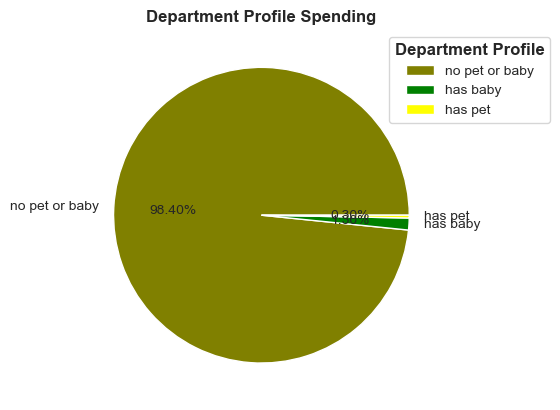

In [69]:
#create pie chart from deptprof_money

deptprof_money_pie = deptprof_money.plot(kind='pie', colors=['olive', 'green', 'yellow'], autopct='%1.2f%%')
plt.title('Department Profile Spending', fontsize=12, fontweight='bold')
legend = plt.legend(loc= 'upper right', bbox_to_anchor=(1.3, 1)) #bbox moves legend outside the plot area and to right
legend.set_title('Department Profile')
title = legend.get_title()
title.set_fontsize(12)
title.set_fontweight('bold')
plt.ylabel('') #remove ylabel

plt.show()

So obviously the department_profile no pet or baby far exceeds the other ones with amount spent.

In [70]:
#export deptprof_money_pie

deptprof_money_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_deptprof_money.png'))

In [71]:
#create cross tab between department and dependant_profile

ct_deptprof_dept = pd.crosstab(df['department'], df['department_profile']) 
ct_deptprof_dept_sort = ct_deptprof_dept.sort_values(by=ct_deptprof_dept.columns.tolist(), ascending=False)
ct_deptprof_dept_sort

department_profile,has baby,has pet,no pet or baby
department,,,
babies,410392,0,0
pets,0,93060,0
produce,0,0,9079273
dairy eggs,0,0,5177182
snacks,0,0,2766406
beverages,0,0,2571901
frozen,0,0,2121731
pantry,0,0,1782705
bakery,0,0,1120828


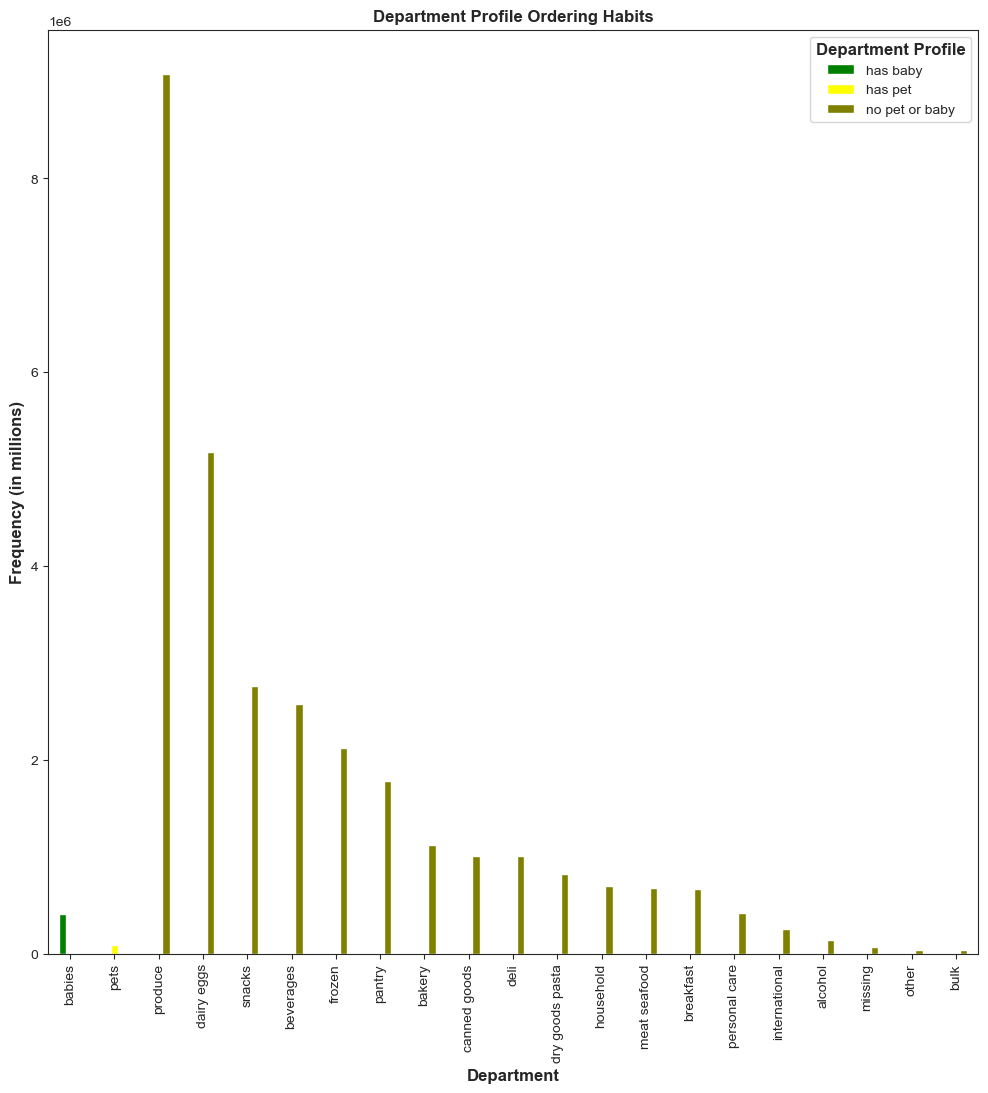

In [72]:
#create bar chart from ct_dept

bar_deptprof_dept = ct_deptprof_dept_sort.plot(kind='bar', color=['green', 'yellow', 'olive'], figsize=(12, 12)) 
sns.set_style('ticks')
plt.xlabel('Department', fontsize=12, fontweight='bold')
plt.ylabel('Frequency (in millions)', fontsize=12, fontweight='bold')
plt.title('Department Profile Ordering Habits', fontsize=12, fontweight='bold')
legend = plt.legend()
legend.set_title('Department Profile')
title = legend.get_title()
title.set_fontsize(12)
title.set_fontweight('bold')

plt.show()

This is an interesting one as it shows that customers with babies or pets only use instacart to buy products for their babies or pets.  The no pet or baby category obviously has the most orders and their ordering habits follow the same pattern as the rest of them: produce, dairy eggs, snacks, beverages, frozen. 

In [73]:
#export deptprof_money_pie

bar_deptprof_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_deptprof_dept.png'))

**17. Customer profile agg**

**age_profile**

In [74]:
#agg prices of age_profile

table_ageprof_prices = df.groupby('age_profile').agg({'prices' : ['mean', 'min', 'max']})
table_ageprof_prices

prices           
                 mean  min   max
age_profile                     
middle-aged  7.791529  1.0  25.0
senior       7.796715  1.0  25.0
young-adult  7.784818  1.0  25.0

In [75]:
#agg days_since_prior_order of age_profile

table_ageprof_days = df.groupby('age_profile').agg({'days_since_prior_order' : ['mean', 'min', 'max']})
table_ageprof_days

days_since_prior_order           
                              mean  min   max
age_profile                                  
middle-aged              10.821972  0.0  30.0
senior                   10.791788  0.0  30.0
young-adult              10.811278  0.0  30.0

**income_profile**

In [76]:
#agg prices of income_profile

table_incprof_prices = df.groupby('income_profile').agg({'prices' : ['mean', 'min', 'max']})
table_incprof_prices

prices           
                        mean  min   max
income_profile                         
lower-class         6.500726  1.0  25.0
lower-middle class  7.020511  1.0  25.0
middle-class        7.925191  1.0  25.0
upper-class         7.776371  1.0  25.0
upper-middle class  7.954720  1.0  25.0

In [77]:
#agg days_since_prior_order of income_profile

table_incprof_days = df.groupby('income_profile').agg({'days_since_prior_order' : ['mean', 'min', 'max']})
table_incprof_days

days_since_prior_order           
                                     mean  min   max
income_profile                                      
lower-class                     11.374436  0.0  30.0
lower-middle class              11.071317  0.0  30.0
middle-class                    10.759882  0.0  30.0
upper-class                     10.170971  0.0  30.0
upper-middle class              10.762271  0.0  30.0

**dependant_profile**

In [78]:
#agg prices of dependant_profile

table_depeprof_prices = df.groupby('dependant_profile').agg({'prices' : ['mean', 'min', 'max']})
table_depeprof_prices

prices           
                       mean  min   max
dependant_profile                     
multi-family       7.790937  1.0  25.0
single-family      7.789550  1.0  25.0

In [79]:
#agg days_since_prior_order of dependant_profile

table_depeprof_days = df.groupby('dependant_profile').agg({'days_since_prior_order' : ['mean', 'min', 'max']})
table_depeprof_days

days_since_prior_order           
                                    mean  min   max
dependant_profile                                  
multi-family                   10.816416  0.0  30.0
single-family                  10.791951  0.0  30.0

**department_profile**

In [80]:
#agg prices of department_profile

table_deptprof_prices = df.groupby('department_profile').agg({'prices' : ['mean', 'min', 'max']})
table_deptprof_prices

prices           
                        mean  min   max
department_profile                     
has baby            7.634399  1.0  15.0
has pet             7.887489  1.0  15.0
no pet or baby      7.792399  1.0  25.0

In [81]:
#agg days_since_prior_order of dependant_profile

table_deptprof_days = df.groupby('department_profile').agg({'days_since_prior_order' : ['mean', 'min', 'max']})
table_deptprof_days

days_since_prior_order           
                                     mean  min   max
department_profile                                  
has baby                         9.780844  0.0  30.0
has pet                         11.593531  0.0  30.0
no pet or baby                  10.821904  0.0  30.0